In [19]:
import torch
import torchvision
import matplotlib.pyplot as plt

import os
import numpy as np

import math

import cv2

In [2]:
import pathlib as Path

In [83]:
root=r'C:\Users\dsi224\Documents\PythonFiles\PythonCodesForDiffusionModel\results_diffusion\results_diffusion'
root_=r'C:\Users\dsi224\Documents\PythonFiles\PythonCodesForDiffusionModel'

In [7]:
files = os.listdir(root)

In [9]:
files[0]

'rCBF_image0_3by3_255_x_00000_y_00000_Test.jpg'

In [16]:
files=[f for f in files if f.startswith('rCBF_image0_3by3_255') and f.endswith('.jpg')]

In [21]:
rootGT=r'C:\Users\dsi224\Documents\PythonFiles\PythonCodesForDiffusionModel\groundTruthFiltered_SPAD.jpg'

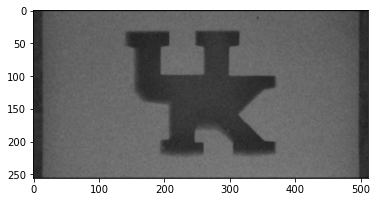

In [28]:
imageGT = (cv2.imread(rootGT, cv2.IMREAD_COLOR))
plt.imshow(imageGT)
plt.show()

512


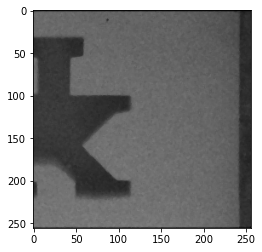

In [36]:
d=imageGT.shape[1]
print(d)
imageGT_R=imageGT[:,int(d/2):d,:]
plt.imshow(imageGT_R)
plt.show()

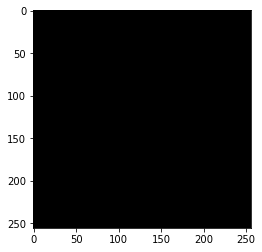

In [37]:
image=imageGT_R*0
plt.imshow(image)
plt.show()

In [40]:
f=files[0]
f

'rCBF_image0_3by3_255_x_00000_y_00000_Test.jpg'

In [43]:
f.split('_')

['rCBF', 'image0', '3by3', '255', 'x', '00000', 'y', '00000', 'Test.jpg']

In [46]:
y=int(f.split('_')[-2])
x=int(f.split('_')[-4])
print(x,y)

0 0


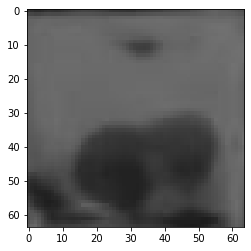

In [48]:
imageSmall=cv2.imread(os.path.join(root,f),cv2.IMREAD_COLOR)
plt.imshow(imageSmall)
plt.show()

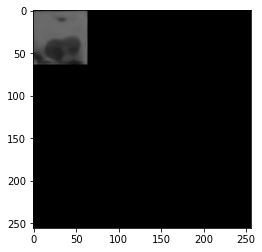

In [53]:
s=imageSmall.shape
image[x:x+s[0],y:y+s[1],:]=imageSmall
plt.imshow(image)
plt.show()

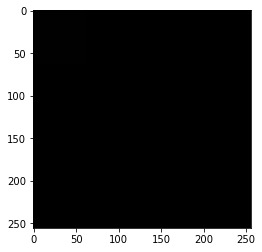

In [57]:
weights=np.zeros_like(image)
ones=np.ones_like(imageSmall)
weights[x:x+s[0],y:y+s[1],:]=ones
plt.imshow(weights)
plt.show()

In [61]:
np.max(weights)

1

In [73]:
image=(image*0).astype(float)
s=imageSmall.shape
weights=np.zeros_like(image)
ones=np.ones_like(imageSmall)

for f in files:
    y=int(f.split('_')[-2])
    x=int(f.split('_')[-4])
    imageSmall=cv2.imread(os.path.join(root,f),cv2.IMREAD_COLOR)/255
    image[x:x+s[0],y:y+s[1],:]+=imageSmall
    weights[x:x+s[0],y:y+s[1],:]+=ones

In [74]:
print(np.max(weights))
print(np.min(weights))

4.0
0.0


In [75]:
weights[weights==0]=1

In [76]:
print(np.max(weights))
print(np.min(weights))

4.0
1.0


In [77]:
image_=image/weights

In [78]:
print(np.max(image))
print(np.max(image_))

1.780392156862745
0.47058823529411764


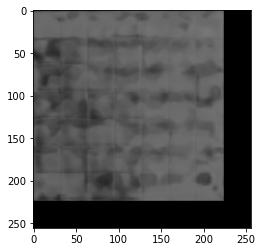

In [81]:
plt.imshow(image_)
plt.show()

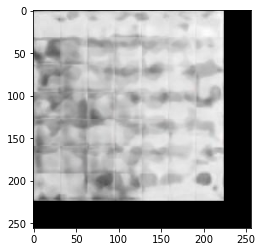

In [82]:
image__=image_/np.max(image_)
plt.imshow(image__)
plt.show()

In [87]:
imageName=os.path.join(root_, ('reconstructedNormalized.jpg'))
cv2.imwrite(imageName, np.floor(image__*255))

True

In [86]:
imageName=os.path.join(root_, ('reconstructed.jpg'))
cv2.imwrite(imageName, np.floor(image_*255))

True